In [3]:
# Написать функцию haversine для подсчета расстояния между пунктами отправления и прибытия

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
nyc = pd.read_csv('train.csv')

In [6]:
# Метод iterrows

In [7]:
# Развернутый for

In [8]:
%%time
def haversine(dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude, radius=6371):
    dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude = \
    [np.radians(x) for x in [dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude]]
    
    lat_sin_2 = np.sin((dropoff_latitude - pickup_latitude) / 2) ** 2
    long_sin_2 = np.sin((dropoff_longitude - pickup_longitude) / 2) ** 2
    lat_cos = np.cos(pickup_latitude) * np.cos(dropoff_latitude)
    
    a = 2 * radius * np.arcsin(np.sqrt(lat_sin_2 + lat_cos * long_sin_2))
    
    return a

distance = []
for i, row in nyc.iterrows():
    dist = haversine(row.dropoff_latitude, row.dropoff_longitude, row.pickup_latitude, row.pickup_longitude)
    distance.append(dist)
nyc['distance'] = distance

nyc.head()

CPU times: user 6.78 s, sys: 32.2 ms, total: 6.81 s
Wall time: 6.81 s


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [9]:
# list comprehention

In [10]:
%%time
def haversine(dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude, radius=6371):
    dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude = [np.radians(x) for x in [dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude]]
    
    lat_sin_2 = np.sin((dropoff_latitude - pickup_latitude) / 2) ** 2
    long_sin_2 = np.sin((dropoff_longitude - pickup_longitude) / 2) ** 2
    lat_cos = np.cos(pickup_latitude) * np.cos(dropoff_latitude)
    
    a = 2 * radius * np.arcsin(np.sqrt(lat_sin_2 + lat_cos * long_sin_2))
    
    return a

nyc['distance'] = pd.Series(haversine(row.dropoff_latitude, row.dropoff_longitude, row.pickup_latitude, row.pickup_longitude) \
                            for i, row in nyc.iterrows())

nyc.head()

CPU times: user 6.77 s, sys: 31.8 ms, total: 6.8 s
Wall time: 6.8 s


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [11]:
# Метод itertuples

In [12]:
%%time
def haversine(dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude, radius=6371):
    dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude =  \
    [np.radians(x) for x in [dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude]]
    
    lat_sin_2 = np.sin((dropoff_latitude - pickup_latitude) / 2) ** 2
    long_sin_2 = np.sin((dropoff_longitude - pickup_longitude) / 2) ** 2
    lat_cos = np.cos(pickup_latitude) * np.cos(dropoff_latitude)
    
    a = 2 * radius * np.arcsin(np.sqrt(lat_sin_2 + lat_cos * long_sin_2))
    
    return a

nyc['distance'] = pd.Series(haversine \
                            (row.dropoff_latitude, row.dropoff_longitude, \
                             row.pickup_latitude, row.pickup_longitude) \
                            for row in nyc.itertuples())

nyc.head()

CPU times: user 805 ms, sys: 4.64 ms, total: 810 ms
Wall time: 808 ms


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [13]:
# Метод apply

In [14]:
%%time
def haversine(dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude, radius=6371):
    dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude =  \
    [np.radians(x) for x in [dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude]]
    
    lat_sin_2 = np.sin((dropoff_latitude - pickup_latitude) / 2) ** 2
    long_sin_2 = np.sin((dropoff_longitude - pickup_longitude) / 2) ** 2
    lat_cos = np.cos(pickup_latitude) * np.cos(dropoff_latitude)
    
    a = 2 * radius * np.arcsin(np.sqrt(lat_sin_2 + lat_cos * long_sin_2))
    
    return a

nyc['distance'] = nyc.apply(lambda x: \
                   haversine(x.dropoff_latitude, x.dropoff_longitude, x.pickup_latitude, x.pickup_longitude), axis=1)

longest = nyc['distance'].max()

nyc.head()

CPU times: user 2.78 s, sys: 51.7 ms, total: 2.83 s
Wall time: 2.83 s


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [15]:
# Метод векторизации

In [16]:
%%time
def haversine(dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude, radius=6371):
    dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude =  \
    [np.radians(x) for x in [dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude]]
    
    lat_sin_2 = np.sin((dropoff_latitude - pickup_latitude) / 2) ** 2
    long_sin_2 = np.sin((dropoff_longitude - pickup_longitude) / 2) ** 2
    lat_cos = np.cos(pickup_latitude) * np.cos(dropoff_latitude)
    
    a = 2 * radius * np.arcsin(np.sqrt(lat_sin_2 + lat_cos * long_sin_2))
    
    return a

nyc['distance'] = haversine(nyc.dropoff_latitude, nyc.dropoff_longitude, nyc.pickup_latitude, nyc.pickup_longitude)

nyc.head()

CPU times: user 11.9 ms, sys: 3.73 ms, total: 15.6 ms
Wall time: 14.3 ms


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [17]:
# Метод numpy array

In [50]:
%%time
def haversine(dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude, radius=6371):
    dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude =  \
    [np.radians(x) for x in [dropoff_latitude, dropoff_longitude, pickup_latitude, pickup_longitude]]
    
    lat_sin_2 = np.sin((dropoff_latitude - pickup_latitude) / 2) ** 2
    long_sin_2 = np.sin((dropoff_longitude - pickup_longitude) / 2) ** 2
    lat_cos = np.cos(pickup_latitude) * np.cos(dropoff_latitude)
    
    a = 2 * radius * np.arcsin(np.sqrt(lat_sin_2 + lat_cos * long_sin_2))
    
    return a

nyc['distance'] = haversine(nyc.dropoff_latitude.values, nyc.dropoff_longitude.values, nyc.pickup_latitude.values, nyc.pickup_longitude.values)

nyc.head()

CPU times: user 11.9 ms, sys: 83 µs, total: 12 ms
Wall time: 9.92 ms


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [19]:
# Ищем координаты с нулями

In [20]:
nyc.query('dropoff_longitude == 0 or dropoff_latitude == 0')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3,0.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1,0.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1,0.0
124,2013-01-17 17:22:00.00000043,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2,0.0
192,2010-09-05 17:08:00.00000092,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5,0.0
...,...,...,...,...,...,...,...,...,...
49625,2012-01-09 19:50:27.0000001,12.1,2012-01-09 19:50:27 UTC,0.0,0.0,0.0,0.0,1,0.0
49816,2012-02-20 00:54:00.000000100,4.9,2012-02-20 00:54:00 UTC,0.0,0.0,0.0,0.0,1,0.0
49845,2009-03-02 21:57:15.0000001,6.6,2009-03-02 21:57:15 UTC,0.0,0.0,0.0,0.0,3,0.0
49856,2010-04-19 17:25:00.000000170,10.9,2010-04-19 17:25:00 UTC,0.0,0.0,0.0,0.0,5,0.0


In [21]:
nyc[['dropoff_longitude', 'dropoff_latitude']].eq(0).sum(1).gt(0).sum()

958

In [22]:
# График распределения координат, что бы понять как лучше фильтровать для получения правильных данных

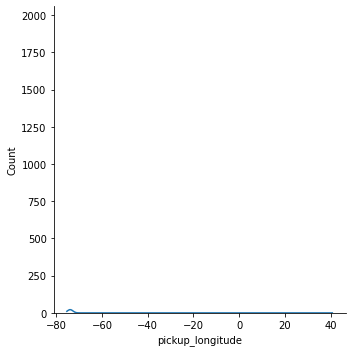

In [29]:
sns.displot(data=nyc, x='pickup_longitude', kde=True)

In [31]:
# Задать фильтрацию и посчитать сколько заплатил пассажир за самую дальнюю поездку

In [71]:
nyc_f = nyc.query('(10 < pickup_latitude < 120) and (pickup_longitude < -60) \
and (10 < dropoff_latitude) and (dropoff_longitude < -60) and (distance < 50)')

In [70]:
nyc_f.loc[nyc_f['distance'].idxmax()].fare_amount

136.0